# Data Analysis of Amazon Top 50 books


In [21]:
import pandas as pd
import numpy as np

# Loading  Data

In [5]:
data = pd.read_csv('books.csv')

In [6]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [10]:
data.shape

(550, 7)

In [11]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [16]:
data.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [17]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

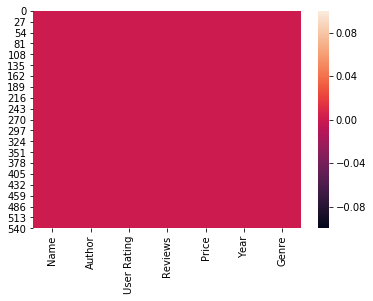

In [20]:
sns.heatmap(data.isnull())
plt.show()

# Outlier Detection

# Outlier are extreme values that deviate from other observations on data, they may indicate a variability in a measurement , experimental errors or a noviety
# Box plot are agreat way of detecting outliers. Once the outliers have been detected they can be imputed with the 5th and 95th percentiles.

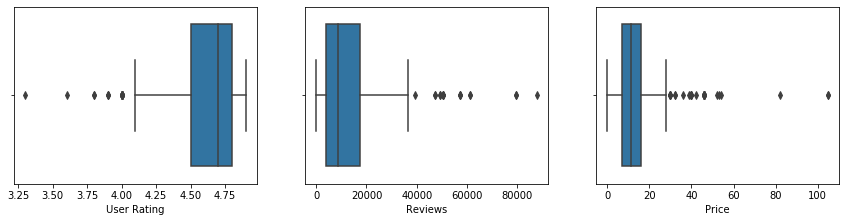

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

# nump.clip() function is used to clip (limit) the values in an array.
# syntax : numpy.clip(a,a_min,a_max,out=None)
# parameter
# a : Array containing elements to clip
# a_min = minimum value
# a_max = maximum value

In [30]:
data['Price']=data['Price'].clip(lower=data['Price'].quantile(0.05), upper =data['Price'].quantile(0.95))

In [41]:
data['User Rating']=data['User Rating'].clip(lower=data['User Rating'].quantile(0.05),upper=data['User Rating'].quantile(0.95))

In [43]:
data['Reviews']=data['Reviews'].clip(lower=data['Reviews'].quantile(0.05),upper=data['Reviews'].quantile(0.95))

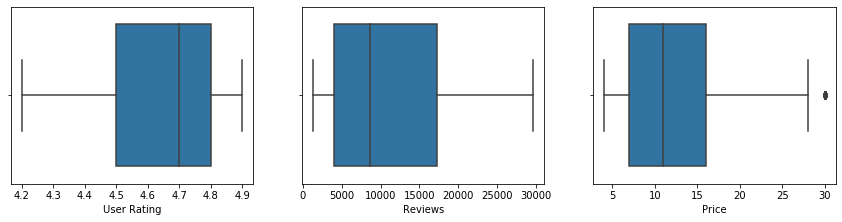

In [44]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['User Rating'])

plt.subplot(4,4,2)
sns.boxplot(data['Reviews'])

plt.subplot(4,4,3)
sns.boxplot(data['Price'])

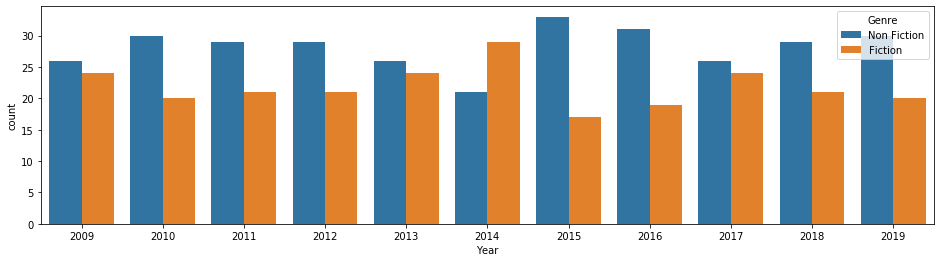

In [46]:
plt.figure(figsize=(16,4))

sns.countplot(x='Year', data=data, hue='Genre')